/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


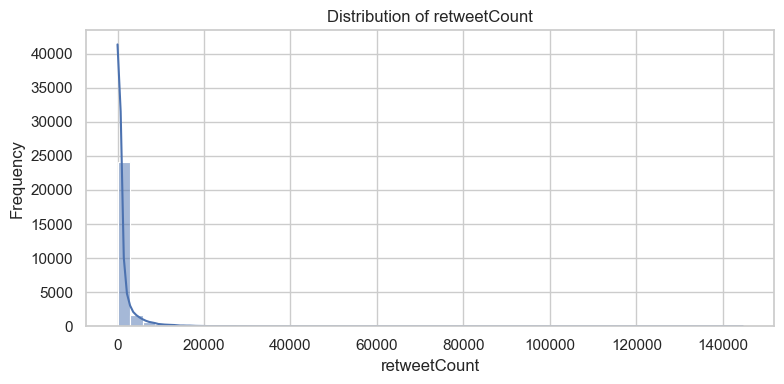

/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


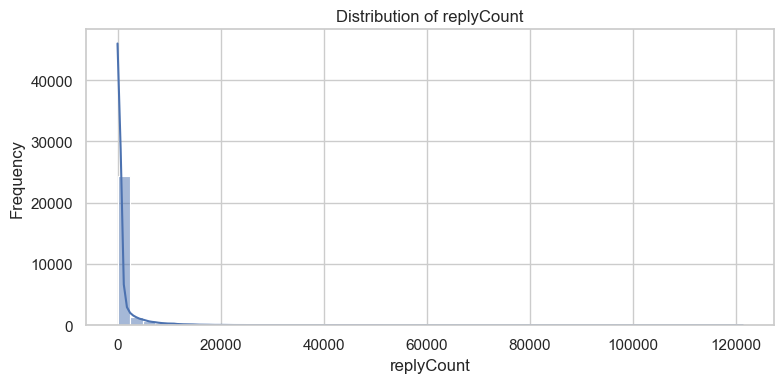

/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


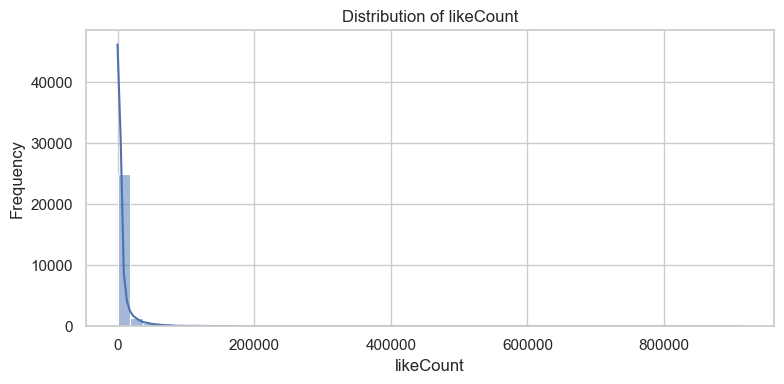

/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


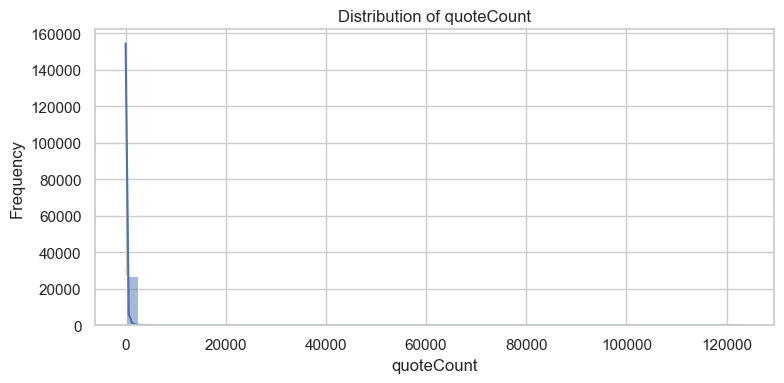

/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


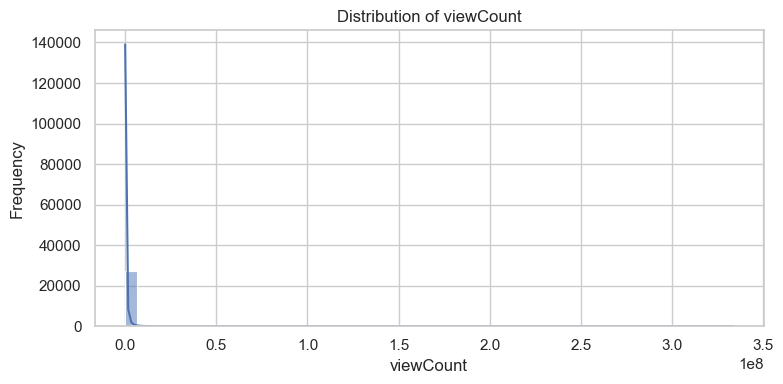

/Users/ayushsaseendran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


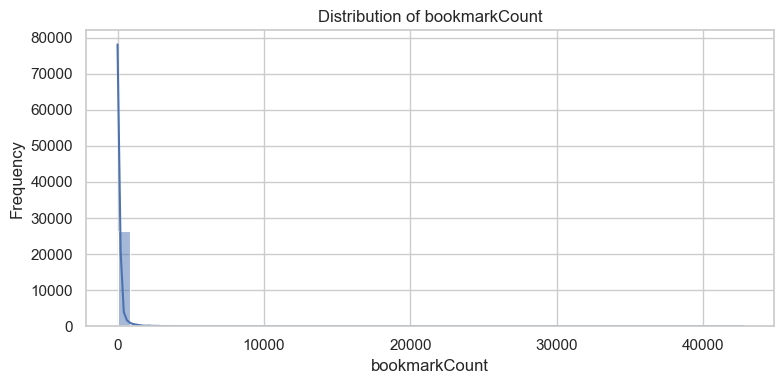

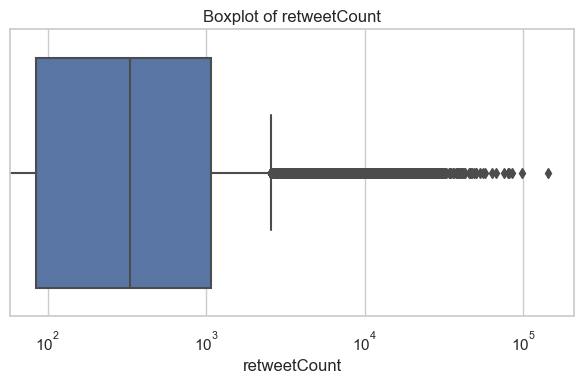

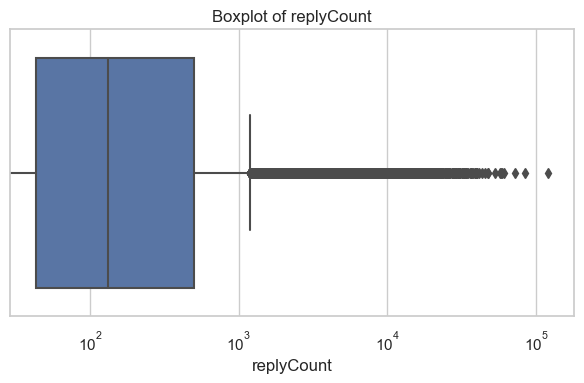

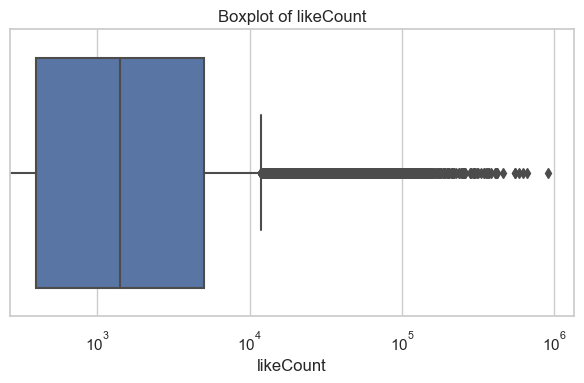

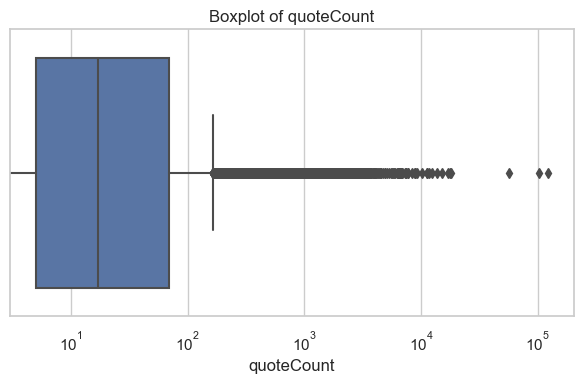

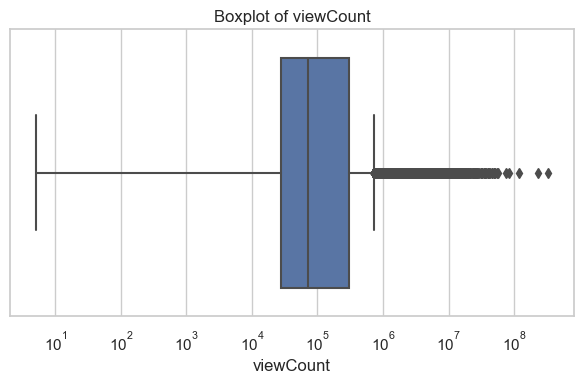

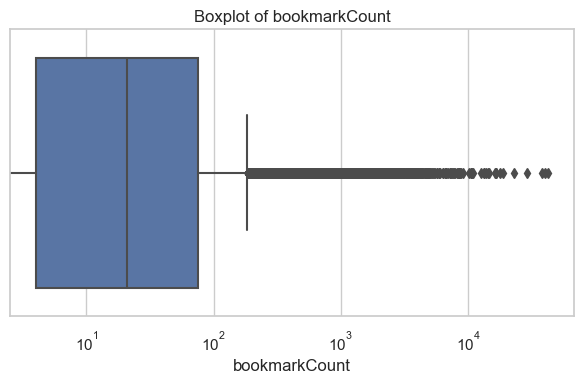

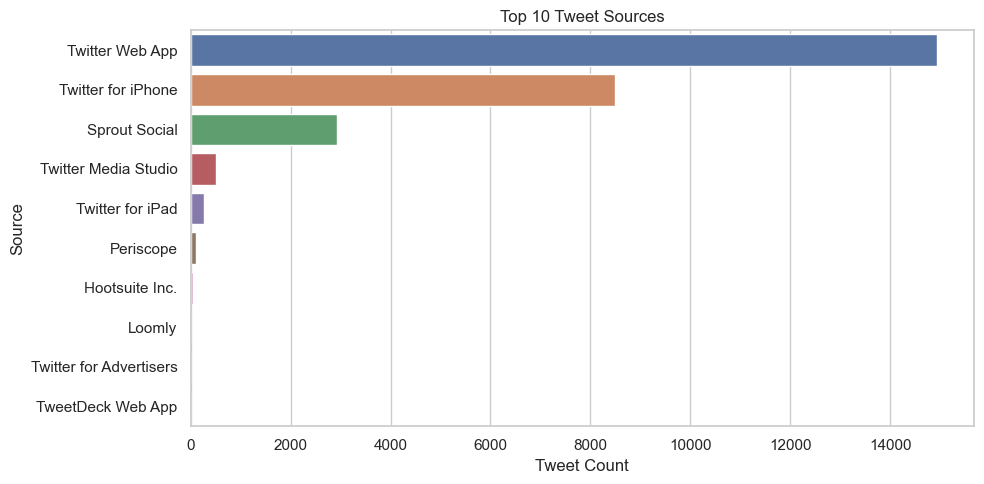

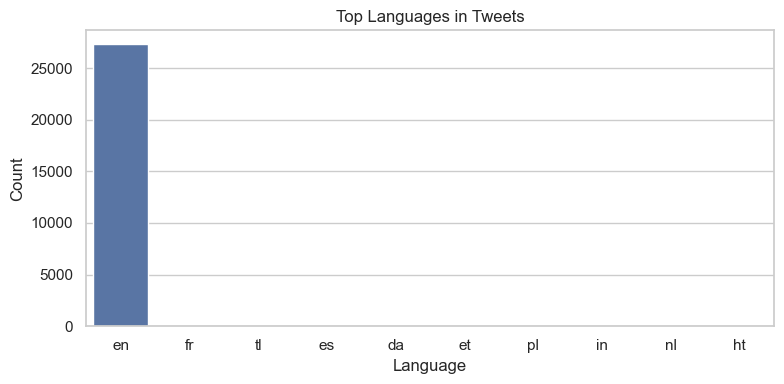

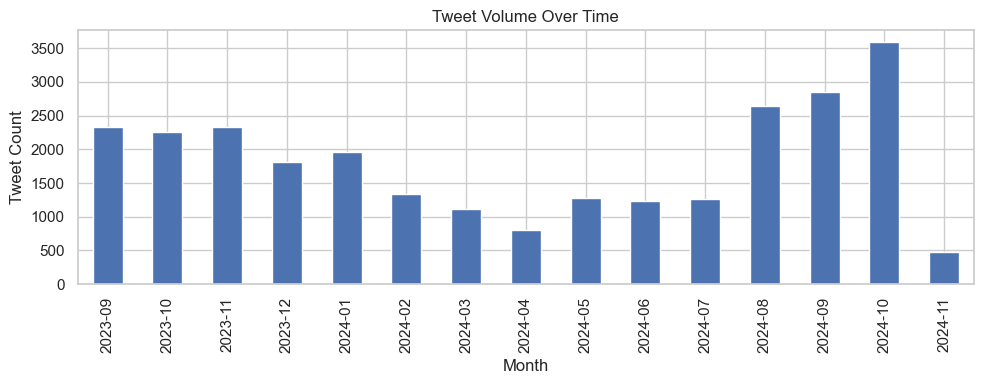

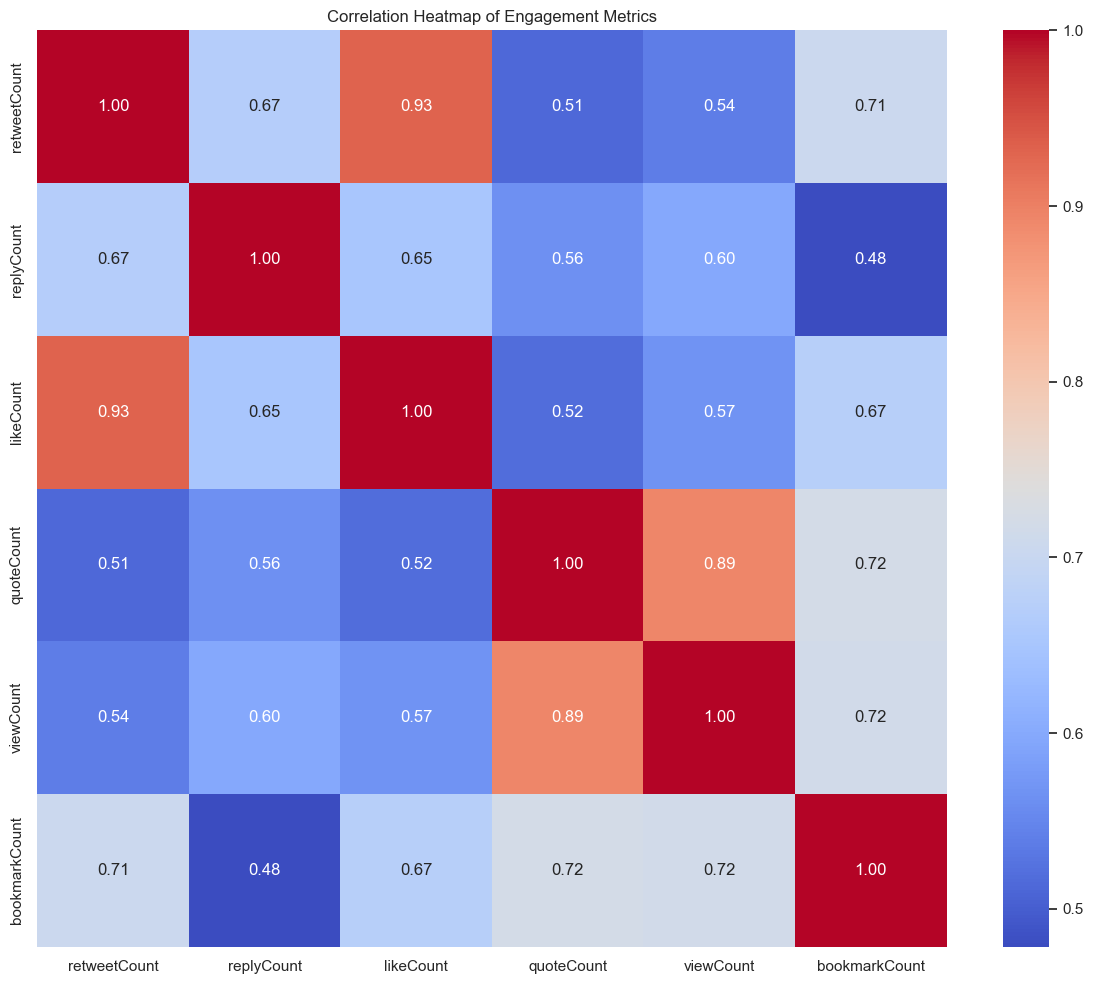

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('2024_tw_posts_president_scored_anon.csv')

# Set up plotting style
sns.set(style="whitegrid")

# Optional: Downsample if too large
# df = df.sample(10000, random_state=42)

# 1. Distribution of numeric engagement metrics
numeric_metrics = ['retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'bookmarkCount']
for col in numeric_metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. Boxplot of engagement metrics (optional log scale for better visualization)
for col in numeric_metrics:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.xscale('log')  # log scale to handle skewness
    plt.tight_layout()
    plt.show()

# 3. Countplot of tweet sources (top 10)
top_sources = df['source'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_sources.index, x=top_sources.values, orient='h')
plt.title('Top 10 Tweet Sources')
plt.xlabel('Tweet Count')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

# 4. Language usage
lang_counts = df['lang'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title('Top Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Time series of tweets per month
df['createdAt'] = pd.to_datetime(df['createdAt'], errors='coerce')
df['month'] = df['createdAt'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
monthly_counts.plot(kind='bar')
plt.title('Tweet Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

# 6. Heatmap of correlations (numeric only)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_metrics].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.tight_layout()
plt.show()
